In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
print(test.shape)
train.shape

(418, 11)


(891, 12)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**DATA VISUALIZATION**

Percentage of Women who Survived : 74.20382165605095
Percentage of Men who Survived : 18.890814558058924


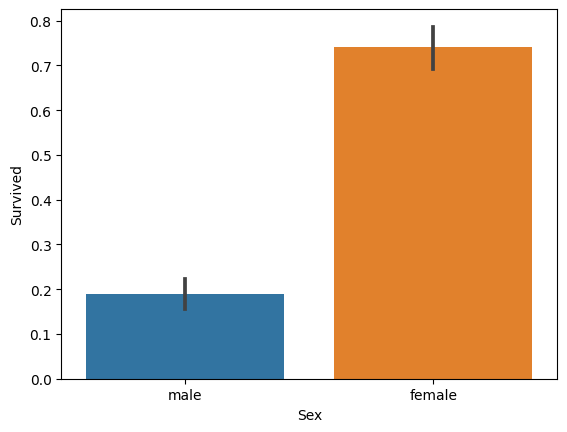

In [7]:
sns.barplot(x='Sex', y='Survived', data=train)

#Print percentages
print('Percentage of Women who Survived :', train['Survived'][train['Sex'] == 'female'].value_counts(normalize=True)[1]*100)

print('Percentage of Men who Survived :', train['Survived'][train['Sex'] == 'male'].value_counts(normalize=True)[1]*100)

Percentage of Pclass = 1 who Survived : 62.96296296296296
Percentage of Pclass = 2 who Survived : 47.28260869565217
Percentage of Pclass = 3 who Survived : 24.236252545824847


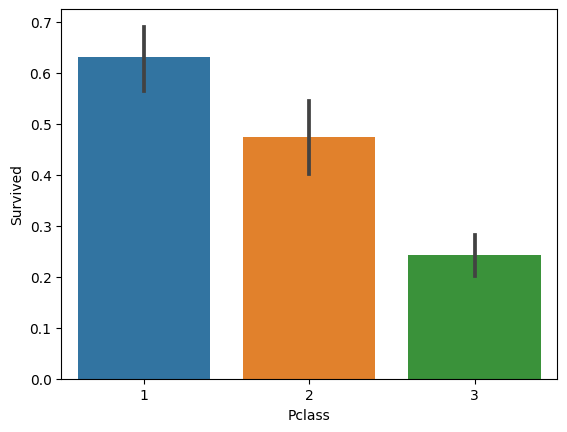

In [8]:
sns.barplot(x = 'Pclass', y = 'Survived', data=train)

print('Percentage of Pclass = 1 who Survived :', train['Survived'][train['Pclass'] == 1].value_counts(normalize=True)[1]*100)

print('Percentage of Pclass = 2 who Survived :', train['Survived'][train['Pclass'] == 2].value_counts(normalize=True)[1]*100)

print('Percentage of Pclass = 3 who Survived :', train['Survived'][train['Pclass'] == 3].value_counts(normalize=True)[1]*100)

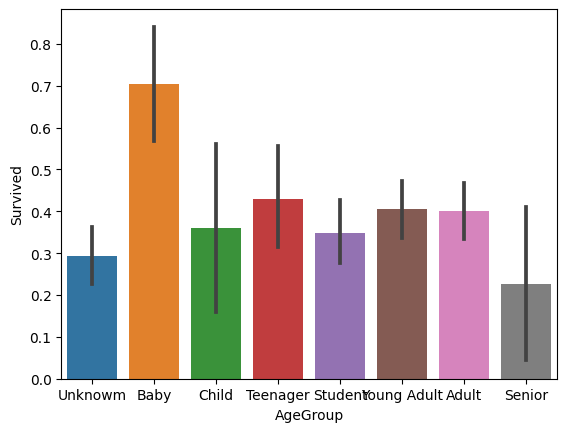

In [9]:
train.Age = train.Age.fillna(-0.5)
test.Age = test.Age.fillna(-0.5)

bins = [-1,0,5,12,18,24,35,60,np.inf]
labels = ['Unknowm', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

train['AgeGroup'] = pd.cut(train['Age'],bins,labels = labels)
test['AgeGroup'] = pd.cut(test['Age'],bins,labels = labels)

sns.barplot(x = 'AgeGroup', y = 'Survived', data = train)
plt.show()

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [11]:
train = train.drop(['Ticket', 'Cabin', 'Fare'], axis = 1)
test = test.drop(['Ticket', 'Cabin', 'Fare'], axis = 1)

**Dealing with missing values**

In [12]:
print('Number of people embarking in Southampton (S) : ')
southampton = train[train['Embarked'] == 'S'].shape[0]
print(southampton)

print('Number of people embarking in Cherbourg (C) : ')
cher = train[train['Embarked'] == 'C'].shape[0]
print(cher)

print('Number of people embarking in Queenstown (Q) : ')
queen = train[train['Embarked'] == 'Q'].shape[0]
print(queen)

Number of people embarking in Southampton (S) : 
644
Number of people embarking in Cherbourg (C) : 
168
Number of people embarking in Queenstown (Q) : 
77


In [13]:
train = train.fillna({'Embarked' : 'S'})

In [14]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
dtype: int64

In [15]:
combine = [train, test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.',expand = False)
    

pd.crosstab(train['Title'], train['Sex'])    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [16]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countless', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()    

,Title,Survived
0,Countess,1.000000
1,Master,0.575000
2,Miss,0.702703
3,Mr,0.156673
4,Mrs,0.793651
5,Rare,0.285714
6,Royal,1.000000


In [17]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Royal':5, 'Rare':6}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1.0
